# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_data = pd.merge(mouse_metadata, study_results, how='outer')
# Display the data table for preview
Combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [114]:
# Checking the number of mice.
mice=Combined_data["Mouse ID"].value_counts()
number_of_mice=len(mice)
number_of_mice

249

In [115]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = Combined_data.loc[Combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [116]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [117]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Combined_data[Combined_data['Mouse ID'].isin(duplicate_mice)==False]

In [118]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [119]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean = clean_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean


regimen_median = clean_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median


regimen_variance = clean_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance


regimen_std = clean_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_std

regimen_sem = clean_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_sem
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats_table

summary_stats_table.to_csv("fileOne.csv", index=False, header=True)


In [120]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
single_group_by = clean_df.groupby('Drug Regimen')
summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_stats_table_2

C:\Users\Jturn\AppData\Local\Temp\ipykernel_4292\166328914.py:6: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats_table_2 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

FileNotFoundError: [Errno 2] No such file or directory: '../Images/Pan_mice_per_treat.png'

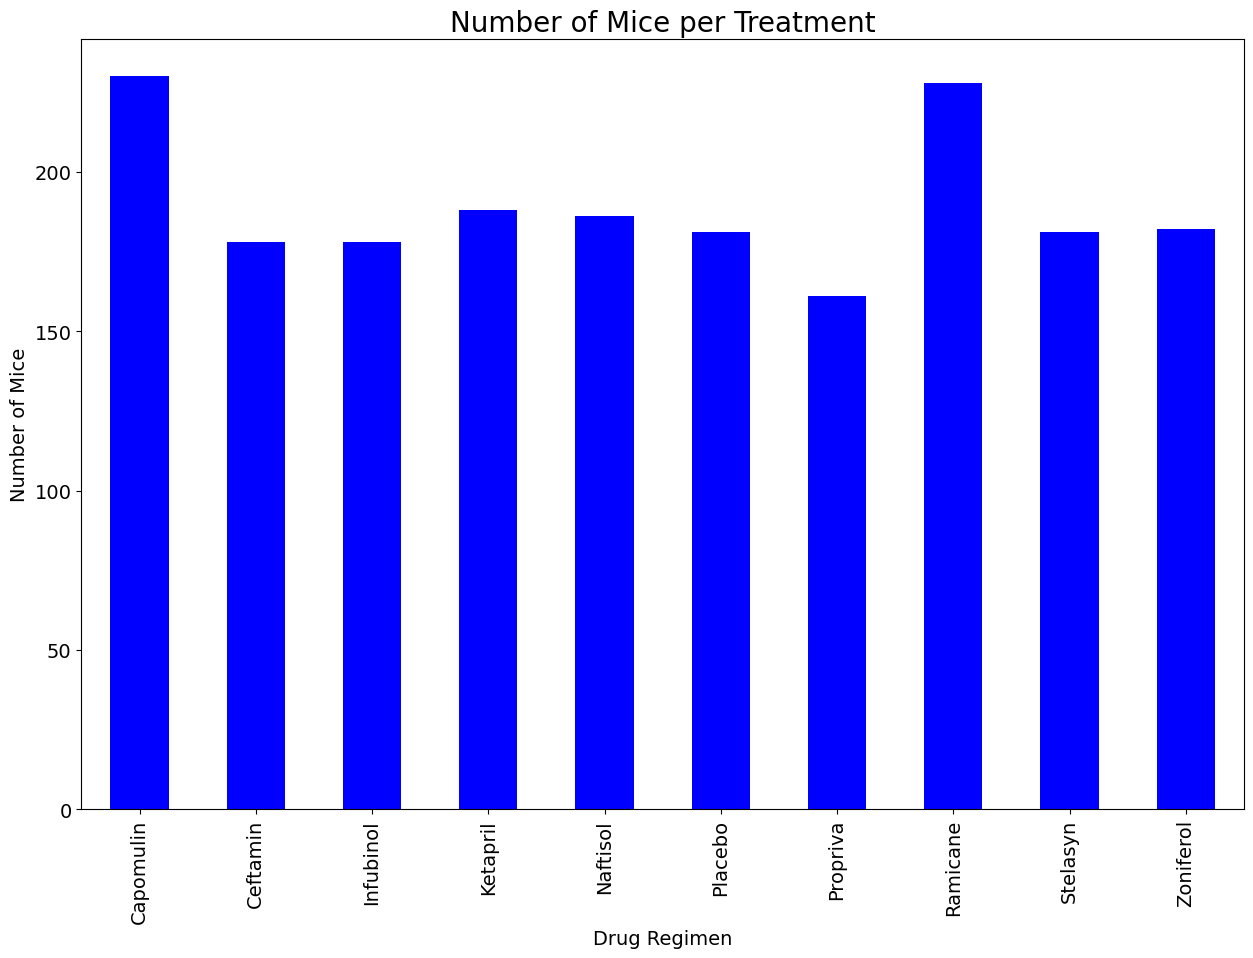

In [121]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count_mice_per_tret = Combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = count_mice_per_tret.plot.bar(figsize=(15,10), color='b',fontsize = 14)
count_mice_per_tret
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.savefig("../Images/Pan_mice_per_treat.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

count_mice_per_tret


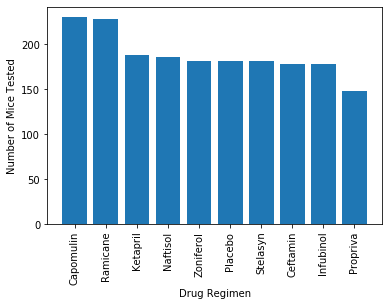

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mice_list =(Combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_list

x_axis = np.arange(len(count_mice_per_tret))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment",fontsize = 22)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)

plt.savefig("../Images/mat_mice_per_treat.png", bbox_inches = "tight")


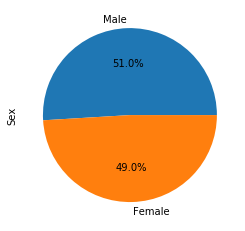

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

colors = ['orange', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 22)
plt.ylabel('Sex',fontsize = 16)
plt.axis("equal",fontsize = 16)

plt.savefig("../Images/pi_pandas.png", bbox_inches = "tight")
plt.show()

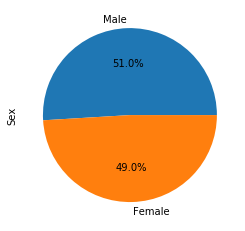

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['orange', 'blue']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 22)
plt.ylabel('Sex',fontsize = 16)

plt.axis("equal",fontsize = 16)

plt.savefig("../Images/pi_plot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, Combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
 # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
     # Determine outliers using upper and lower bounds
    


Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of treatment is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


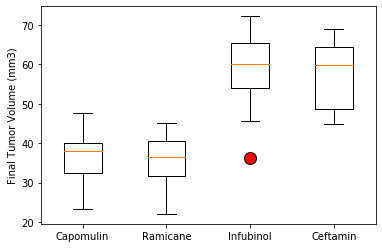

In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =26)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 16)
ax1.set_xlabel('Drug Regimen',fontsize = 16)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

## Line and Scatter Plots

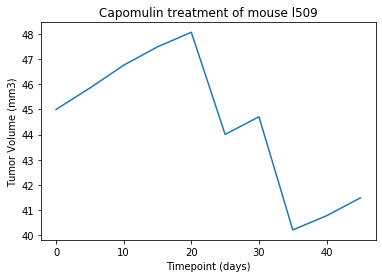

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
forline_df.head()

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =26)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =16)
plt.ylabel('Tumor Volume (mm3)',fontsize =16)


plt.savefig("../Images/line_graph.png", bbox_inches = "tight")
plt.show()


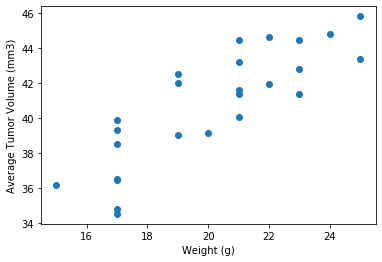

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_capm_vol =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'],s=175, color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)


plt.savefig("../Images/scatterplot.png", bbox_inches = "tight")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


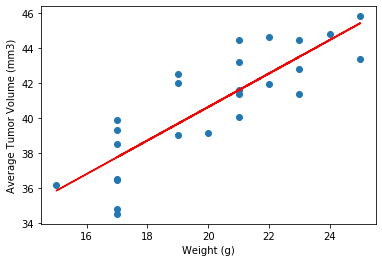

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(avg_capm_vol['Weight (g)'],avg_capm_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

In [ ]:
x_values = avg_capm_vol['Weight (g)']
y_values = avg_capm_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)


fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="blue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Mouse Weight Versus Average Tumor Volume',fontsize =22)
plt.xlabel('Weight(g)',fontsize =16)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =16)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.savefig("../Images/linear_regression.png", bbox_inches = "tight")
plt.show()
